In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

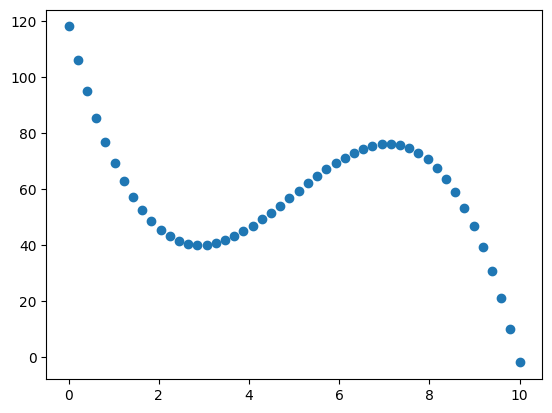

In [142]:

base_polynomial = np.polynomial.polynomial.Polynomial.fromroots((1, 6 ,8))

x , y = base_polynomial.linspace(n=50, domain=(0, 10))

y = -y + 70

plt.scatter(x,y)

Now add random data on top


(50,)
(50,)


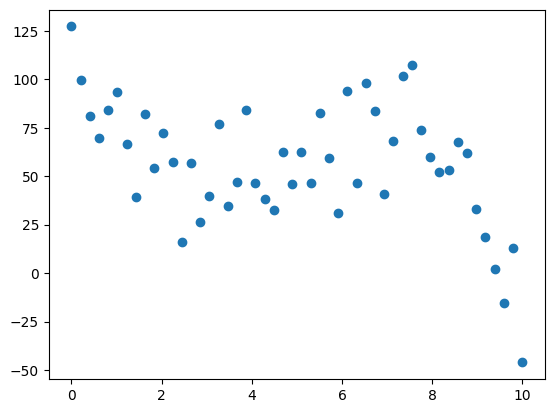

In [143]:
y += 20 * np.random.randn(y.size)

# replace x with integer values

x = np.linspace(0, 10, 50)

plt.scatter(x, y)
print(x.shape)
print(y.shape)

In [144]:
d = {"x": x, "y": y}
df = pd.DataFrame(data=d)
df.head()

,x,y
0,0.000000,127.194879
1,0.204082,99.763344
2,0.408163,80.852128
3,0.612245,69.546985
4,0.816327,84.318045


Now try to fit a model to this df

In [145]:
x = df[["x"]].values
y = df["y"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=22)

In [146]:
x_poly_train = PolynomialFeatures(degree=3).fit_transform(x_train)

x_poly_test = PolynomialFeatures(degree=3).fit_transform(x_test)

polymodel = LinearRegression()

polymodel.fit(x_poly_train, y_train)

y_poly_pred = polymodel.predict(x_poly_test)



In [147]:
x_test[:,0]

array([6.53061224, 2.44897959, 5.10204082, 9.59183673, 6.73469388])

In [148]:
# Helper code to visualise the results
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y
# y values corresponding to sorted test data
y_test = y_test[idx]



# Non-linear predicted values
y_poly_pred= y_poly_pred[idx]

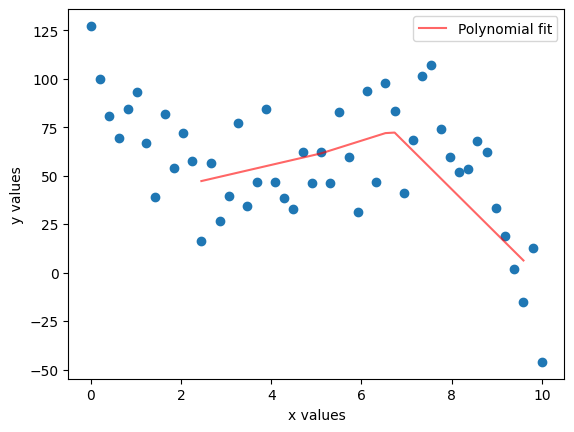

In [149]:
plt.scatter(x, y)

plt.plot(x_test, y_poly_pred, label="Polynomial fit",color='red', alpha=0.6)

plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [150]:
poly_residuals = y_test - y_poly_pred

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0.]),
 array([-20.        , -17.89473684, -15.78947368, -13.68421053,
        -11.57894737,  -9.47368421,  -7.36842105,  -5.26315789,
         -3.15789474,  -1.05263158,   1.05263158,   3.15789474,
          5.26315789,   7.36842105,   9.47368421,  11.57894737,
         13.68421053,  15.78947368,  17.89473684,  20.        ]),
 <BarContainer object of 19 artists>)

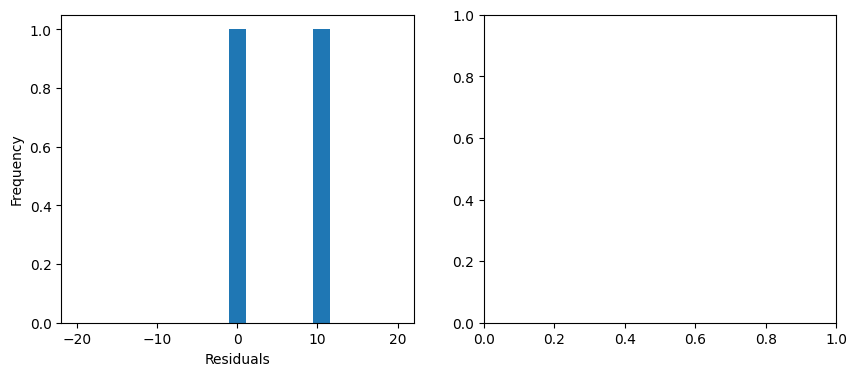

In [151]:
fig, ax = plt.subplots(1,2, figsize= (10,4))
bins = np.linspace(-20,20,20)

ax[0].set_xlabel("Residuals")
ax[0].set_ylabel("Frequency")

ax[0].hist(poly_residuals, bins)


In [152]:
MSE = mean_squared_error(y_test, y_poly_pred)

MSE

445.4196965871955

[ 0.         -0.84802851 -0.36684682]
[  0.         -60.09319187  14.38822891  -0.9810556 ]
[  0.         -33.09562856   2.22154305   0.89415187  -0.09260667]
[ 0.00000000e+00 -6.26027700e+01  2.37880223e+01 -4.97616616e+00
  5.73091144e-01 -2.66477954e-02]
[ 0.00000000e+00 -8.56710228e+01  4.89193213e+01 -1.53848113e+01
  2.55298019e+00 -2.01626915e-01  5.82513594e-03]
[ 0.00000000e+00 -5.99808831e+01  1.05940724e+01  6.65272689e+00
 -3.59058263e+00  6.86716814e-01 -5.82671180e-02  1.82367498e-03]
[ 0.00000000e+00 -9.17215097e+01  7.36709395e+01 -4.20318458e+01
  1.51825005e+01 -3.28416760e+00  4.09739147e-01 -2.69962808e-02
  7.22457053e-04]
[ 0.00000000e+00 -2.23641669e+02  4.07341187e+02 -3.69269094e+02
  1.78420437e+02 -4.95241288e+01  8.16016649e+00 -7.87895676e-01
  4.11467387e-02 -8.97067103e-04]
[ 0.00000000e+00 -1.15563463e+02  6.50973266e+01  4.88708613e+01
 -8.46204144e+01  4.65687676e+01 -1.33711146e+01  2.21304843e+00
 -2.12477029e-01  1.09986209e-02 -2.37535065e-04]
[ 0.

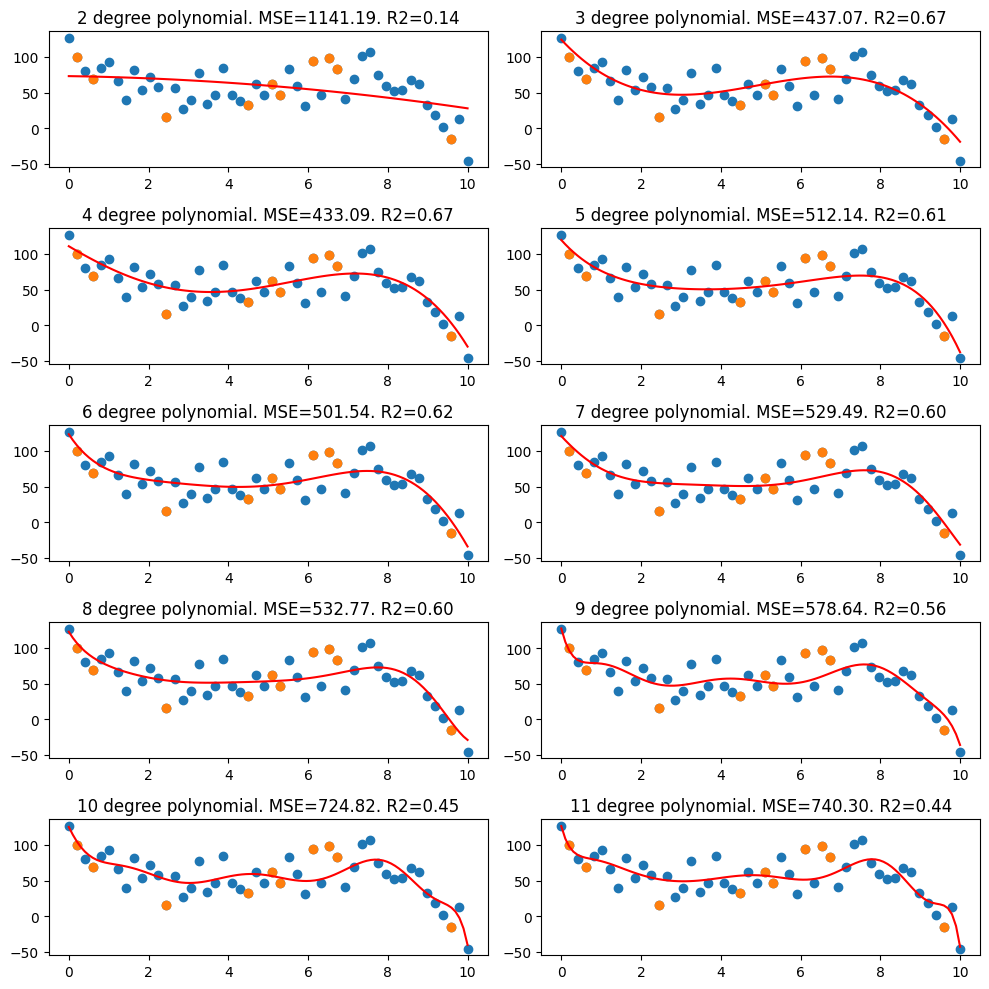

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=22)


degrees = range(2, 12)


fig, ax = plt.subplots(int(len(degrees)/2), 2, figsize= (10,10))

ax.shape

i=0

for row in range(ax.shape[0]):
    for column in range(ax.shape[1]):
        
        degree = degrees[i]

        x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train)    
        x_poly_test = PolynomialFeatures(degree=degree).fit_transform(x_test)

        polymodel = LinearRegression()
        polymodel.fit(x_poly_train, y_train)

        y_poly_pred = polymodel.predict(x_poly_test)

        print(polymodel.coef_)

        idx = np.argsort(x_test[:,0])
        x_test = x_test[idx]
        y_test = y_test[idx]
        y_poly_pred = y_poly_pred[idx]

        MSE = mean_squared_error(y_test, y_poly_pred)
        r2 = r2_score(y_test, y_poly_pred)

        # using linspace to create smoother lines
        x_l = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
        x_poly_l = PolynomialFeatures(degree=degree).fit_transform(x_l)
        x_poly_pred_l = polymodel.predict(x_poly_l)

        ax[row, column].scatter(x,y)
        ax[row, column].scatter(x_test,y_test)
        ax[row, column].plot(x_l, x_poly_pred_l, color="red")
        ax[row, column].set_title(f"{degree} degree polynomial. MSE={MSE:.2f}. R2={r2:.2f}")
        i+=1


fig.tight_layout()